# 1. 강의영상 

- <https://youtu.be/playlist?list=PLQqh36zP38-y50V9RPpXbBFFOXuCC5qCt&si=rmXkq99Bhp6jgEBf>

# 2. Imports 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.tree
import sklearn.ensemble
#---#
import warnings
warnings.filterwarnings('ignore')

# 3. Data 

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/insurance.csv')
df_train

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# 4. Bagging의 단점 

## A. Baggin으로 적합 

In [4]:
# step1
X = pd.get_dummies(df_train.loc[:,'age':'region'],drop_first=True)
y = df_train['charges']
# step2 
predictr = sklearn.ensemble.BaggingRegressor()
# step3
predictr.fit(X,y)
# step4 -- pass 

BaggingRegressor()

## B. 결과 시각화

`-` 관찰: 트리들의 다양하지 않다. 

In [11]:
predictr.estimators_ # 10개의 estimators.

[DecisionTreeRegressor(random_state=1148720136),
 DecisionTreeRegressor(random_state=304735399),
 DecisionTreeRegressor(random_state=1906207855),
 DecisionTreeRegressor(random_state=1311279426),
 DecisionTreeRegressor(random_state=1352332538),
 DecisionTreeRegressor(random_state=232981945),
 DecisionTreeRegressor(random_state=708664711),
 DecisionTreeRegressor(random_state=1731872076),
 DecisionTreeRegressor(random_state=827341768),
 DecisionTreeRegressor(random_state=1340855572)]

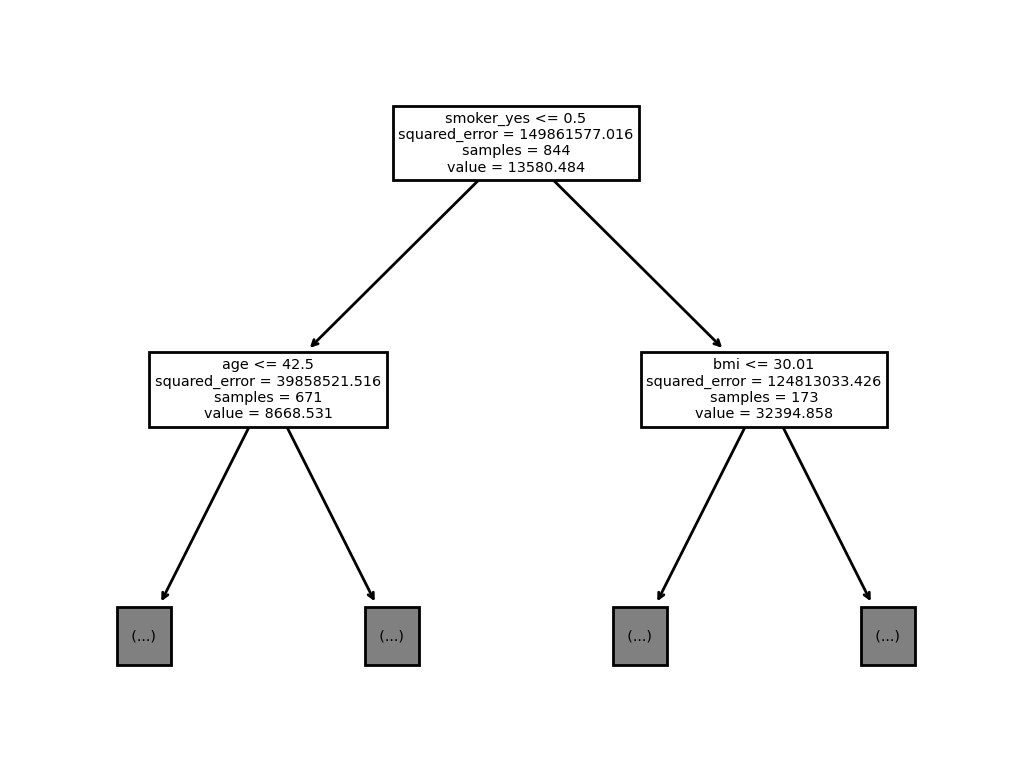

In [13]:
sklearn.tree.plot_tree(
    predictr.estimators_[4],
    feature_names=X.columns.tolist(),
    max_depth=1
);
fig = plt.gcf()
fig.set_dpi(200)

`-` 5번째 estimator

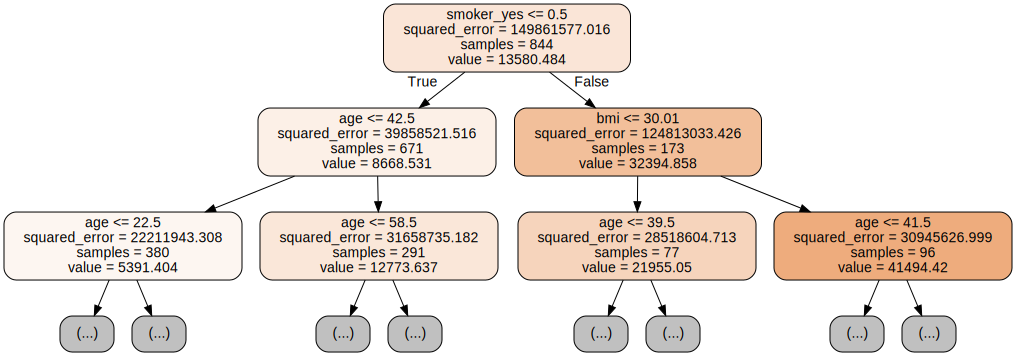

In [33]:
import graphviz
from sklearn.tree import export_graphviz

# export_graphviz 함수를 이용해서 dot 형식의 트리그래프 생성
dot_data = export_graphviz(predictr.estimators_[4], feature_names=X.columns.tolist(), filled=True, rounded=True, max_depth=2)
graphviz.Source(dot_data)

`-` 7번째 estimator

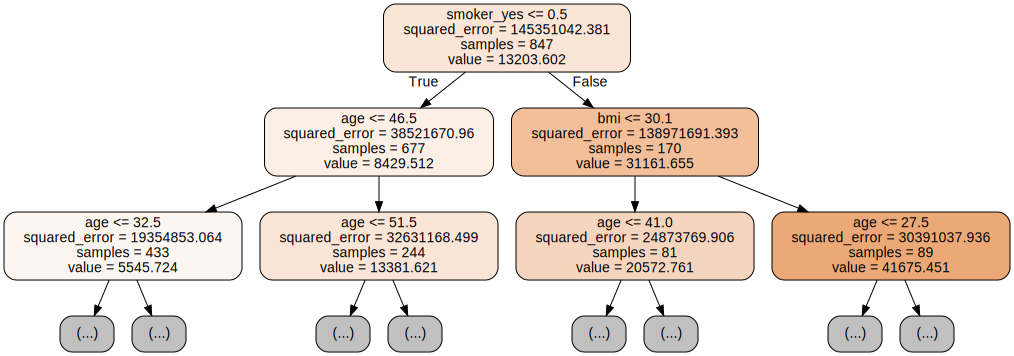

In [32]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(predictr.estimators_[6], feature_names=X.columns.tolist(), filled=True, rounded=True, max_depth=2)
graphviz.Source(dot_data)

- 숫자들은 조금씩 다르다. 전체 observation을 사용하는 것이 아니라 리샘플링한 데이터를 적합을 시키기 때문이다.
- `smoker_yes`를 첫 변수로 뽑는 것이 바뀌지 않는 이유는 모든 변수들을 넣어서 테스트 해봤을 때, `smoker_yes`를 기준으로 나누는 것이 $R^2$ score 상 유리하기 때문이다.
- 숫자들만 조금씩 바뀌고 뽑아지는 변수의 딱히 바뀌지 않는다. --> 트리들이 다양하지 않다. --> 이게 배깅의 약점이다.

`-` 의문 

트리가 다양하지 않은게 왜 약점이지?

## C. 우수성 vs 다양성 

`-` 다양성이 없는게 왜 문제인가? 

- 기존의 의사결정나무: 데이터에 최적화된 **똑똑한 하나**의 트리를 발견
- Bagging: "데이터에 최적화"를 희생하고 "다양성"을 확보. 즉 **똑똑한 하나**의 트리대신에 **모자란 여러개**의 트리를 생성하고 힘을 합침.

`DecisionTree` 
- 자료 --> 적합 : 똑똑한 하나의 트리

`Bagging`
- 자료 --> 리샘플링 --> 적합: 모자란 하나의 트리
- 자료 --> 리샘플링 --> 적합: 모자란 또 다른 하나의 트리
- $\cdots$

`-` 우수성 vs 다양성 -- 우수하지만 비슷한 생각을 가진 10명의 인재 vs 평범하지만 다양한 의견을 가진 10명의 인재 

- 뭐가 좋을까요? 
- 김용대 교수님의 통찰! <https://biz.heraldcorp.com/view.php?ud=20170802000434>

::: {.callout-note}
기계학습 방법론 중 앙상블이라는 방법이 있다. 앙상블이란 음악에서 여러 명의 연주자에 의한 합주 또는 합창을 의미하는데, 다양한 의견들을 조화롭게 결합하는 방법을 의미하기도 한다. 기계학습에서 앙상블이란 같은 데이터를 여러 개의 기계학습 알고리즘들이 분석하여 각자 지식을 습득한 후 이를 결합하여 새롭고 유용한 지식을 창출하는 방법이다.

앙상블 방법론에 숨어 있는 매우 흥미롭고 이해하기 어려운 과학적 현상으로는, 앙상블의 성능을 높이기 위해서는 개별 알고리즘들의 성능보다는 알고리즘들의 다양성이 훨씬 중요하다는 것이다. 즉, 주어진 문제에 대해서 모두 비슷한 답을 주는 성능이 우수한 10개의 알고리즘보다는 성능은 좀 떨어지지만 다양한 답을 제공하는 10개의 알고리즘이 앙상블에는 더 효율적이라는 것이다. 이를 인간 사회에 적용하면, 비슷한 생각을 가진 우수한 10명의 인재보다는 다양한 의견을 가진 평범한 10명의 의견이 훨씬 유용할 수 있다는 것이다.
:::

> 그래서 **"랜덤포레스트"** 라는 방법이 나오게 되었다.

`-` 요약 

- 통찰: Bagging은 의사결정나무보다 다양성을 추구하는 알고리즘이다. 
- 문제점: 하지만 ${\bf X}$가 고차원인 상황에서 배깅만으로는 그렇게 다양한 트리가 나오지 않는다. (모든 트리가 천편일륜적으로 흡연여부가 보험료에 미치는 영향을 우선적으로 연구한다) 
- 소망: 혹시 어떤 괴짜는 흡연여부를 연구하지 않고 다른 변수들을 최우선으로 연구하는 연구자가 있다면 좋겠는데.. (그러면 트리가 다양해질텐데)

# 5. 랜덤포레스트 

## A. 개념 

> Bagging에 max_feature를 제한하는 방법을 제안.

`-` RandomForeset = Bagging + `max_feature=??`

- 엄밀한 수식은 아닙니다.

`-` 슈도-알고리즘의 비교 

```Python
## Bagging 
trees = []
for i in range(100):
    tree = sklearn.tree.DecisionTreeRegressor() 
    X_sample,y_sample = boostrap(X,y) # 매순간 샘플바뀜
    tree.fit(X_sample,y_sample) # 일부 샘플만으로 적합
    trees.append(tree) # 학습한 나무를 저장
yhat = ensemble(trees) # 여러개의 나무를 종합하여 하나의 예측값을 만들어냄 (합주)

## RandomForeset 
forest = [] 
for i in range(100):
    tree = sklearn.tree.DecisionTreeRegressor(max_feature=1) # 매순간 설명변수 바뀜
    X_sample,y_sample = boostrap(X,y) # 매순간 샘플바뀜    
    tree.fit(X_sample,y_sample) # 일부설명변수, 일부샘플만으로 적합 
    forest.append(tree) # 학습한 나무를 숲에 저장 
yhat = ensemble(forest) # 여러개의 나무를 종합하여 하나의 예측값을 만들어냄 (합주) 
```

## B. 일단 적합 

In [37]:
# step1 -- pass 
# step2 
predictr = sklearn.ensemble.RandomForestRegressor(
    max_depth=1,
    max_features=1/3 # 각각의 트리에 적용되는 옵션. (전체 피처중 1/3정도만 학습할거야.)
)
# step3
predictr.fit(X,y)
# step4 

RandomForestRegressor(max_depth=1, max_features=0.3333333333333333)

- `max_features=1` : 전체 피처들 중 랜덤으로 1개를 뽑아 학습한다는 것.
- `max_features=0.5`: 전체 피처들 중 50% 정도만 학습한다는 것.

In [42]:
len(predictr.estimators_)

100

In [36]:
# sklearn.ensemble.RandomForestRegressor?

> 주의1: `max_feature=1`은 1개의 feature를 고려한다는 의미이고, `max_feature=1.0`은 100%의 feature를 고려한다는 의미이다. 

> 주의2: `max_feature=1.0` 이 default값이며 이 값을 사용한다면 "RandomForest = Bagging" 이다. (아래 ref 참고)

- ref: <https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html>

## C. 시각화 

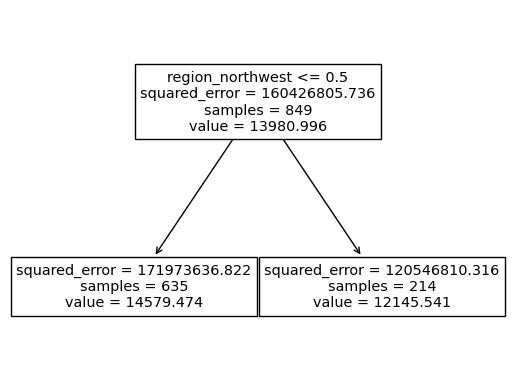

In [46]:
sklearn.tree.plot_tree(
    predictr.estimators_[5],
    feature_names=X.columns.tolist(),
    max_depth=1
);

- `region_northwest`를 먼저 연구한 트리.

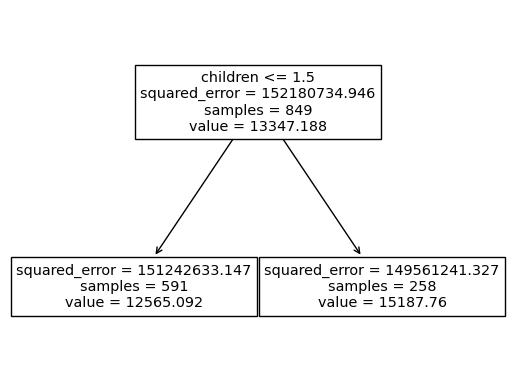

In [47]:
sklearn.tree.plot_tree(
    predictr.estimators_[4],
    feature_names=X.columns.tolist(),
    max_depth=1
);

- `childeren`을 먼저 연구한 트리.

> 일반적인 Bagging 방법에 비해 랜덤포레스트에서 다양성이 훨씬 더 많이 확보되었음을 쉽게 파악할 수 있다.

# 6. 랜덤포레스트 재현

## A. random_state 추출

`-` 첫번째 트리 - random_state 확인

In [48]:
predictr.estimators_[0]

DecisionTreeRegressor(max_depth=1, max_features=0.3333333333333333,
                      random_state=115825912)

`-` 첫번째 트리의 random_state가 저장된 곳

In [51]:
predictr.estimators_[0].random_state

115825912

`-` 각 나무들의 random_state 추출 

In [52]:
rs = [tree.random_state for tree in predictr.estimators_] # 100개의 random_state 저장.

In [56]:
rs[:5]

[115825912, 1440244931, 2072811334, 832457061, 121563411]

## B. forest 생성 

In [58]:
my_forest = [sklearn.tree.DecisionTreeRegressor(max_depth=1,max_features=1/3,random_state=r) for r in rs] # tree들의 모임.

In [59]:
my_forest[-1]

DecisionTreeRegressor(max_depth=1, max_features=0.3333333333333333,
                      random_state=1321455257)

In [60]:
predictr.estimators_[-1]

DecisionTreeRegressor(max_depth=1, max_features=0.3333333333333333,
                      random_state=1321455257)

## C. 부스트랩 샘플생성

`-` 저장된 부스트랩 샘플을 확보하자. -- 실패

In [61]:
predictr.estimators_samples_

AttributeError: 'RandomForestRegressor' object has no attribute 'estimators_samples_'

- 샘플들을 재현하기 귀찮게 되어있다.

`-` 그냥 새로 만들어보자!

In [63]:
sklearn.ensemble._forest._generate_sample_indices?

Signature:
sklearn.ensemble._forest._generate_sample_indices(
    random_state,
    n_samples,
    n_samples_bootstrap,
)
Docstring: Private function used to _parallel_build_trees function.
File:      ~/anaconda3/envs/mp/lib/python3.10/site-packages/sklearn/ensemble/_forest.py
Type:      function

- `sklearn.ensemble`에 `_forest` 라는 모듈이 숨겨져 있었음.
- `_foreset`모듈에 있는 `_generate_sample_indeces`라는 함수를 보면, random_state를 넣고 뽑을 샘플의 수를 정하면 되는 것 같다.

In [65]:
sample = sklearn.ensemble._forest._generate_sample_indices

In [71]:
id(sample), id(sklearn.ensemble._forest._generate_sample_indices) # id는 sample이 저장된 메모리 주소.

(140251644367712, 140251644367712)

---

`-` 사용 예시

In [78]:
_arr = np.array([1,2,3,4,6,7,8,9,10])
sample(random_state=0, n_samples=10, n_samples_bootstrap=5)

array([5, 0, 3, 3, 7])

In [79]:
sample(random_state=1, n_samples=10, n_samples_bootstrap=5)

array([5, 8, 9, 5, 0])

---

In [85]:
my_index = [sample(random_state=r,n_samples=1338,n_samples_bootstrap=1338) for r in rs] 

In [84]:
np.array([sample(random_state=r, n_samples=1338, n_samples_bootstrap=1338) for r in rs]).shape

(100, 1338)

## D. 적합 

---

`-` `zip` 에 대한 설명

In [97]:
my_index[0], my_forest[0] # 이렇게 동시에 뽑고 싶다.

(array([646, 693, 441, ..., 158, 183, 930]),
 DecisionTreeRegressor(max_depth=1, max_features=0.3333333333333333,
                       random_state=115825912))

```python
# 물론 이렇게 해도 된다.
for i in range(100):
    print(my_index[i])
    print(my_forest[i])

# 이렇게 해도 같은 코드!
for idx, tree in zip(my_index, my_forest):
    print(idx, tree)
```

---

In [100]:
for idx,tree in zip(my_index, my_forest):
    X_sampled, y_sampled = np.array(X)[idx], np.array(y)[idx]
    tree.fit(X_sampled,y_sampled)

## E. 앙상블 

---

In [113]:
np.stack([tree.predict(X) for tree in my_forest]).shape

(100, 1338)

- 첫번째 축이 사라져야 함.

In [118]:
np.stack([tree.predict(X) for tree in my_forest]).mean(axis=0) # shape: (1338,)

(1338,)

---

In [119]:
def ensemble(forest):
    return np.stack([tree.predict(X) for tree in forest]).mean(axis=0)

In [120]:
ensemble(my_forest)

array([17119.05659641, 12084.36123917, 12371.33668852, ...,
       12084.54461021, 10691.84446396, 18223.64822057])

In [121]:
predictr.predict(X)

array([17119.05659641, 12084.36123917, 12371.33668852, ...,
       12084.54461021, 10691.84446396, 18223.64822057])

- `ensemble(my_forest)`과 `predictr.predict(X)`는 완전히 똑같이 나온다. -- 완벽히 재현!

## F. 주의

`-` `max_depth`가 깊을 경우 `ensemble(my_forest)`와 `predictr.predict(X)`의 결과가 일치하지 않을 수 있다. 이유는 트리의 성장을 멈추는 조건에서 각 leaf의 최소 샘플숫자가 기여하는데, 샘플의 가중치를 고려하느냐 하지 않느냐에 따라서 샘플숫자의 차이가 있기 때문 

`-` 시각화 비교 (samples가 서로다름을 파악!!)

[Text(0.5, 0.75, 'x[4] <= 0.5\nsquared_error = 152698111.736\nsamples = 1338\nvalue = 13417.975'),
 Text(0.25, 0.25, 'squared_error = 33926584.735\nsamples = 1056\nvalue = 8373.279'),
 Text(0.75, 0.25, 'squared_error = 145299956.24\nsamples = 282\nvalue = 32308.751')]

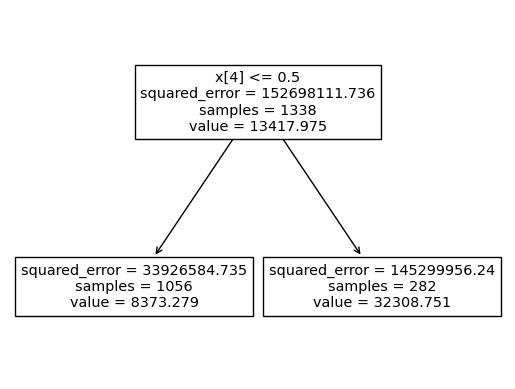

In [122]:
sklearn.tree.plot_tree(my_forest[0])

[Text(0.5, 0.75, 'x[4] <= 0.5\nsquared_error = 152698111.736\nsamples = 847\nvalue = 13417.975'),
 Text(0.25, 0.25, 'squared_error = 33926584.735\nsamples = 677\nvalue = 8373.279'),
 Text(0.75, 0.25, 'squared_error = 145299956.24\nsamples = 170\nvalue = 32308.751')]

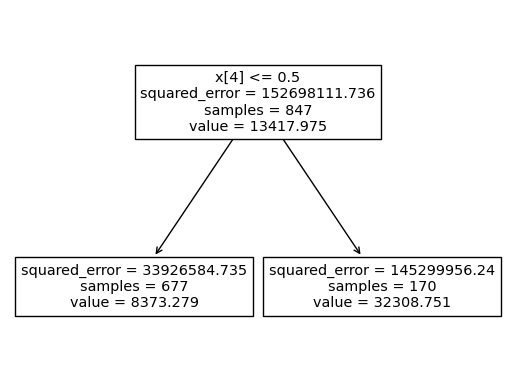

In [123]:
sklearn.tree.plot_tree(predictr.estimators_[0])

- 위에있는거는 1338개의 샘플을 썼는데 아래것은 847개의 샘플을 썼다?
- 아래 것은 847개 사용한 것 대신에 가중치를 고려한 것이고, 위에 것은 가중치를 고려하지 않은 대신 샘플을 1338개 사용한 것이다.

In [124]:
my_index[0]

array([646, 693, 441, ..., 158, 183, 930])

In [128]:
len(set(my_index[0])) # 얘의 unique한 원소를 보면 847개이다!

847